In [16]:
from tensorflow.keras.preprocessing import image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow import keras
from tensorflow.keras import layers
import keras.layers
import cv2
import os
from sklearn.model_selection import train_test_split
# from skimage.io import imread

In [17]:
#initializing the cnn
model=Sequential()

In [18]:
#part2-fitting the cnn to the images
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Generating images for the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)

In [19]:
# Creating training set
training_set = train_datagen.flow_from_directory('C:/Users/Dell/Desktop/finalyrproject/Dataset otitis media/Training-validation',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
# Creating the Test set
test_set = test_datagen.flow_from_directory('C:/Users/Dell/Desktop/finalyrproject/Dataset otitis media/Testing',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 720 images belonging to 4 classes.
Found 160 images belonging to 4 classes.


In [20]:
training_set.class_indices

{'Chronic otitis media': 0,
 'Earwax plug': 1,
 'Myringosclerosis': 2,
 'Normal': 3}

In [21]:
training_set.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [22]:
inputs = keras.Input((64, 64, 3))
x = keras.layers.Conv2D(filters = 256, kernel_size = 2, activation = 'relu', padding = 'same')(inputs)
x = keras.layers.Conv2D(filters = 128, kernel_size = 2, activation = 'relu', padding = 'same')(x)
x = keras.layers.Conv2D(filters = 128, kernel_size = 2, activation = 'relu', padding = 'same')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = keras.layers.Dropout(0.5, input_shape = (2,2))(x)
x = keras.layers.Conv2D(filters = 64, kernel_size = 2, activation = 'relu', padding = 'same')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = keras.layers.Dropout(0.5, input_shape = (2,2))(x)
x = keras.layers.Dense(256, activation = 'relu')(x)
x = keras.layers.Flatten()(x)
output = keras.layers.Dense(4, activation = 'softmax')(x)

model = keras.Model(inputs = inputs, outputs = output)

In [23]:
model.compile(
    loss = keras.losses.CategoricalCrossentropy(from_logits=False),
    optimizer=keras.optimizers.Adam(learning_rate = 0.001),
    metrics=["accuracy"]
)

In [24]:
print(model.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 256)       3328      
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 128)       131200    
                                                                 
 conv2d_6 (Conv2D)           (None, 64, 64, 128)       65664     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 32, 32, 128)       0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 32, 32, 128)       0         
                                                           

In [25]:
history = model.fit(training_set , epochs = 200 , validation_data=(test_set))
# in 200 epochs we should get good accuracy

Epoch 1/200


23/23 [==============================] - 49s 2s/step - loss: 1.3115 - accuracy: 0.3667 - val_loss: 1.1888 - val_accuracy: 0.4750
Epoch 2/200
23/23 [==============================] - 43s 2s/step - loss: 1.0637 - accuracy: 0.5292 - val_loss: 1.0470 - val_accuracy: 0.5375
Epoch 3/200
23/23 [==============================] - 43s 2s/step - loss: 0.8781 - accuracy: 0.5972 - val_loss: 1.0123 - val_accuracy: 0.6438
Epoch 4/200
23/23 [==============================] - 43s 2s/step - loss: 0.8140 - accuracy: 0.6306 - val_loss: 0.8815 - val_accuracy: 0.6500
Epoch 5/200
23/23 [==============================] - 43s 2s/step - loss: 0.7639 - accuracy: 0.6778 - val_loss: 0.9035 - val_accuracy: 0.6250
Epoch 6/200
23/23 [==============================] - 43s 2s/step - loss: 0.7746 - accuracy: 0.6681 - val_loss: 1.1341 - val_accuracy: 0.3938
Epoch 7/200
23/23 [==============================] - 44s 2s/step - loss: 0.7763 - accuracy: 0.6611 - val_loss: 0.8926 - val_accuracy: 0.7188
Epoch 8/200
23/23 [======

In [26]:
model.save('C:/Users/Dell/Desktop/finalyrproject/Dataset otitis media/Multi_class_classification/result2.hdf5')

In [27]:
# from keras.utils.vis_utils import plot_model
from keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


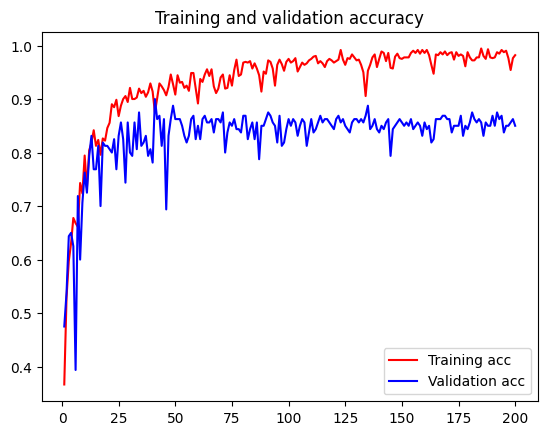

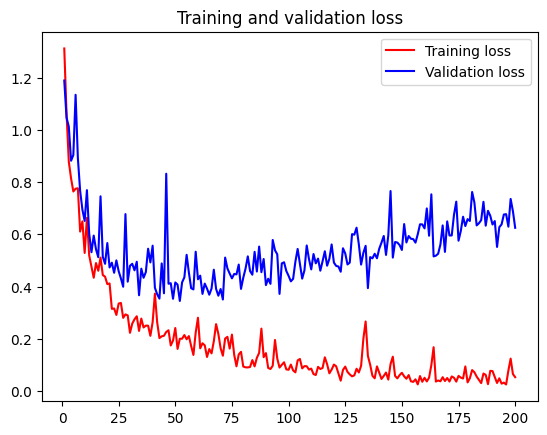

In [28]:

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

'aom': 0,
 'csom': 1,
 'earVentilationTube': 2,
 'earwax': 3,
 'foreignObjectEar': 4,
 'normal': 5,
 'otitisexterna': 6,
 'pseudoMembranes': 7,
 'tympanoskleros': 8

In [29]:
# dir_path = '/content/drive/MyDrive/Multi_class_classification/validation'

# # img = image.load_img('/content/drive/MyDrive/ear_data/tympanic_membrane_dataset_2/test/abnormal/aom (11).png')
# # plt.imshow(img)

# {
#   'aom' : 0,
#   'csom': 1,
#  'earVentilationTube': 2,
#  'earwax': 3,
#  'foreignObjectEar': 4,
#  'normal': 5,
#  'otitisexterna': 6,
#  'pseudoMembranes': 7,
#  'tympanoskleros': 8}

# for i in os.listdir(dir_path):
#   img = image.load_img(dir_path+'//'+i, target_size=(64,64))
#   plt.imshow(img)
#   plt.show()

#   X = image.img_to_array(img)
#   X = np.expand_dims(X , axis = 0)
#   images = np.vstack([X])
#   val = model.predict(images)
#   print(i)
#   # if val == 0:
#   #   print("abnormal")
#   # else if:
#   #   print("normal")
#   if val.any() == 0:
#     print("aom")
#   elif val.any() == 1:
#     print("csom")
#   elif val.any() == 2:
#     print("earVentilationTube")
#   elif val.any() == 3:
#     print("earwax")
#   elif val.any() == 4:
#     print("foreignObjectEar")
#   elif val.any() == 5:
#     print("normal")
#   elif val.any() == 6:
#     print("otitisexterna")
#   elif val.any() == 7:
#     print("pseudoMembranes")
#   elif val.any() == 8:
#     print("tympanoskleros")
#   else:
#     print("Invalid class index")

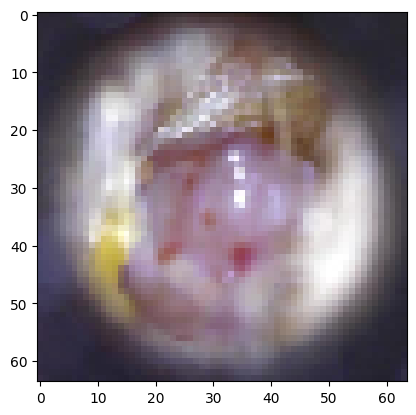

1/1 [==============================] - 2s 2s/step
o1.jpg
normal


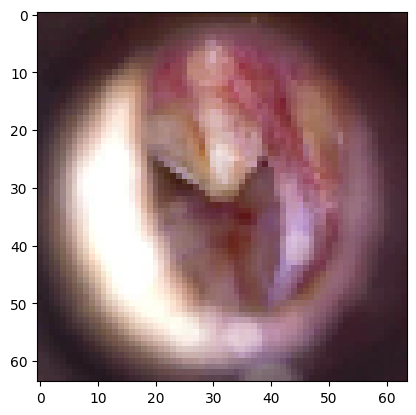

1/1 [==============================] - 0s 303ms/step
o10.jpg
normal


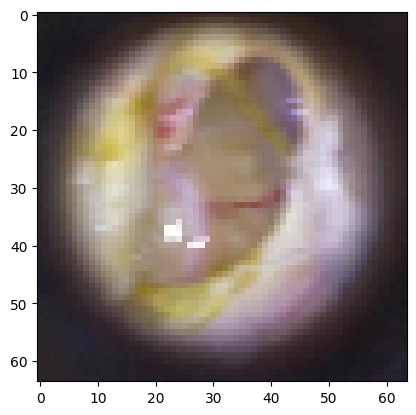

1/1 [==============================] - 0s 257ms/step
o11.jpg
normal


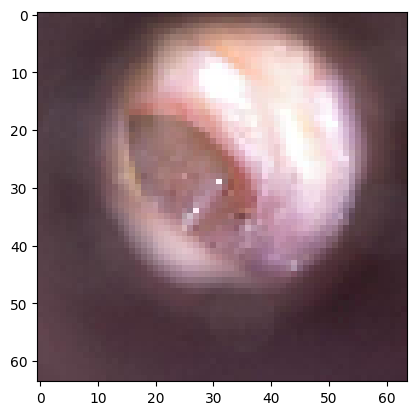

1/1 [==============================] - 0s 219ms/step
o12.jpg
normal


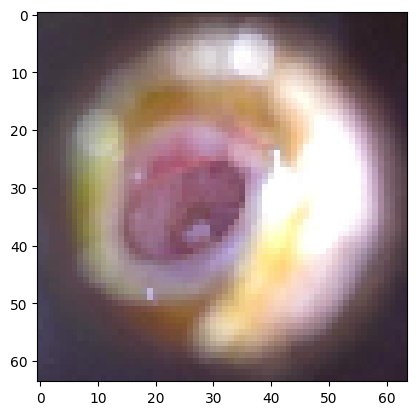

1/1 [==============================] - 0s 213ms/step
o13.jpg
normal


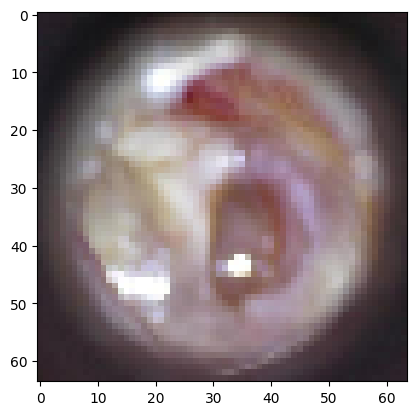

1/1 [==============================] - 0s 258ms/step
o14.jpg
normal


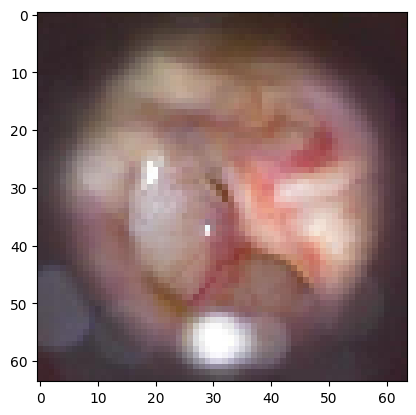

1/1 [==============================] - 0s 217ms/step
o15.jpg
normal


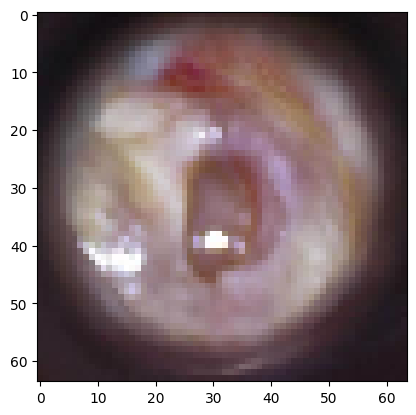

1/1 [==============================] - 0s 362ms/step
o16.jpg
normal


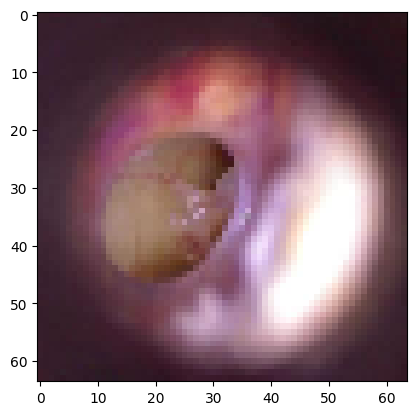

1/1 [==============================] - 0s 268ms/step
o17.jpg
normal


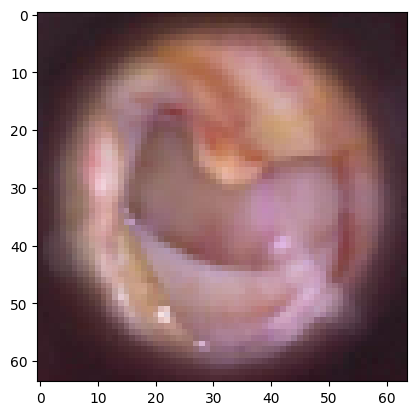

1/1 [==============================] - 0s 216ms/step
o18.jpg
normal


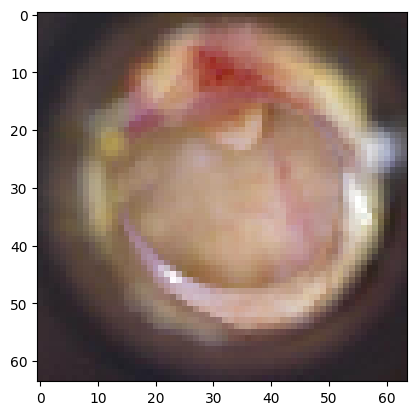

1/1 [==============================] - 0s 309ms/step
o19.jpg
normal


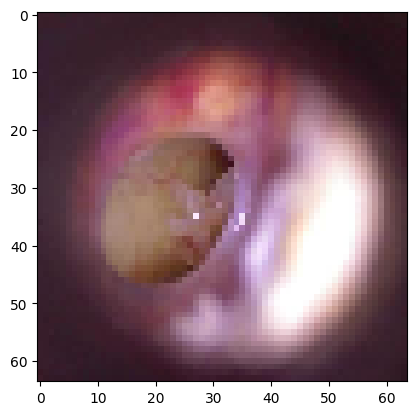

1/1 [==============================] - 0s 214ms/step
o2.jpg
normal


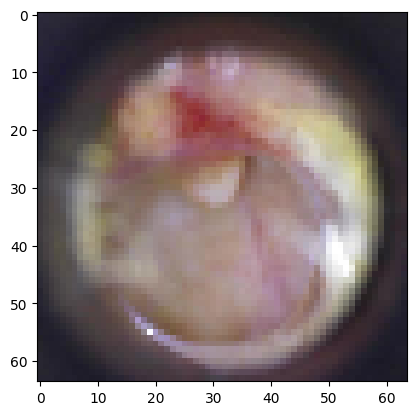

1/1 [==============================] - 0s 241ms/step
o20.jpg
normal


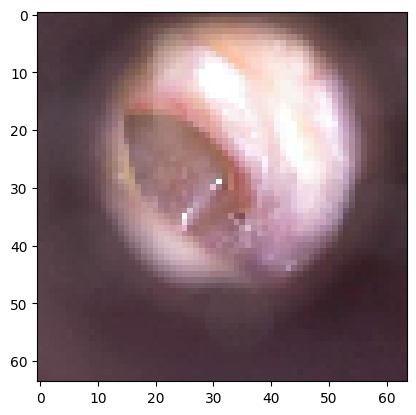

1/1 [==============================] - 0s 243ms/step
o21.jpg
normal


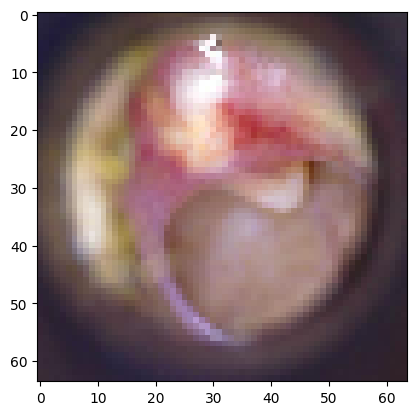

1/1 [==============================] - 0s 223ms/step
o22.jpg
normal


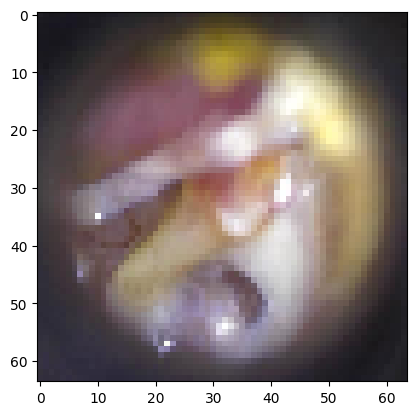

1/1 [==============================] - 0s 169ms/step
o23.jpg
normal


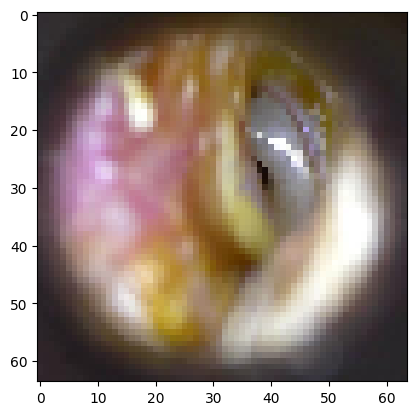

1/1 [==============================] - 0s 124ms/step
o24.jpg
normal


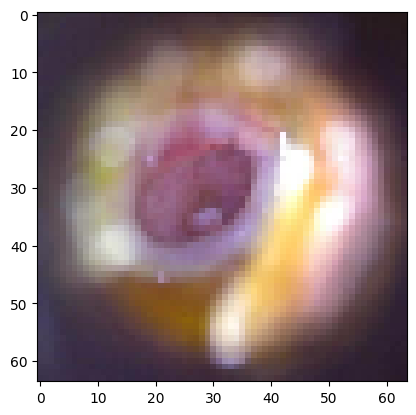

1/1 [==============================] - 0s 314ms/step
o25.jpg
normal


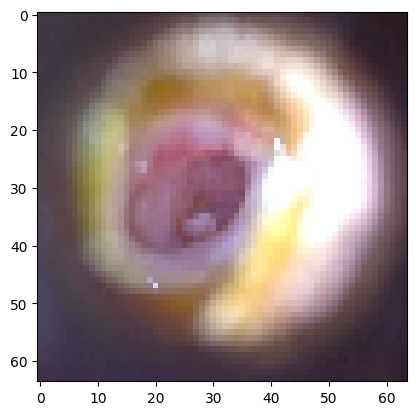

1/1 [==============================] - 0s 210ms/step
o26.jpg
normal


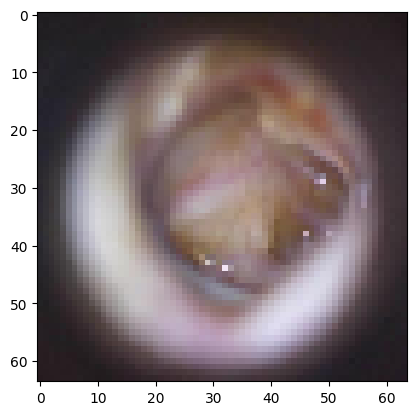

1/1 [==============================] - 0s 225ms/step
o27.jpg
normal


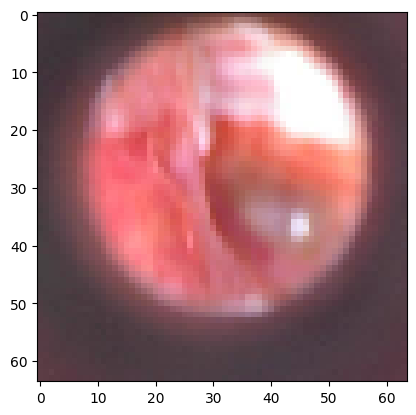

1/1 [==============================] - 0s 255ms/step
o28.jpg
normal


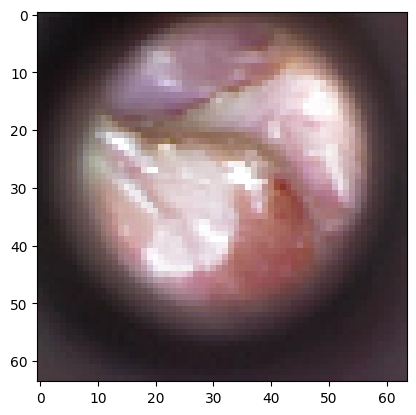

1/1 [==============================] - 0s 212ms/step
o29.jpg
normal


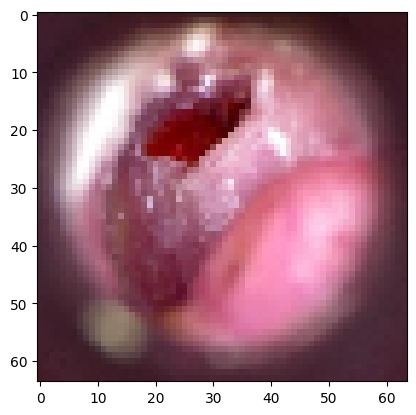

1/1 [==============================] - 0s 271ms/step
o3.jpg
normal


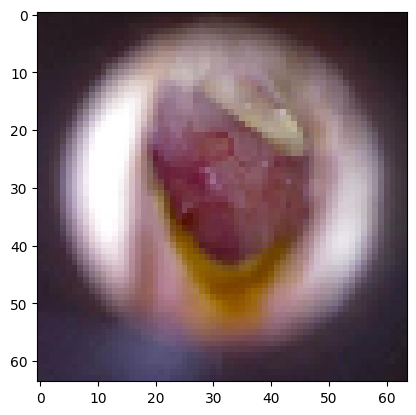

1/1 [==============================] - 0s 243ms/step
o30.jpg
normal


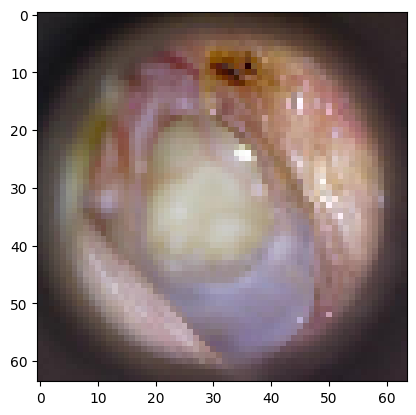

1/1 [==============================] - 0s 341ms/step
o31.jpg
normal


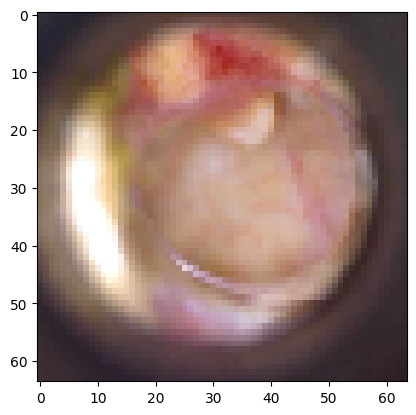

1/1 [==============================] - 0s 274ms/step
o32.jpg
normal


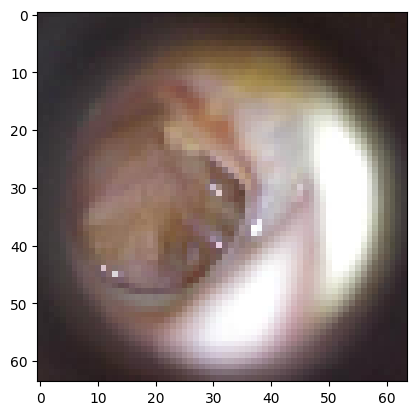

1/1 [==============================] - 0s 297ms/step
o33.jpg
normal


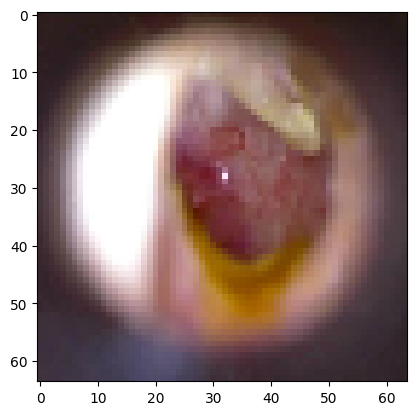

1/1 [==============================] - 0s 387ms/step
o34.jpg
normal


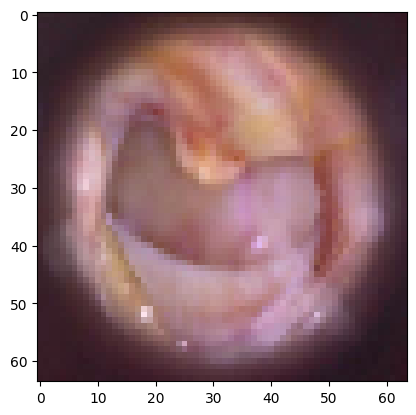

1/1 [==============================] - 0s 259ms/step
o35.jpg
normal


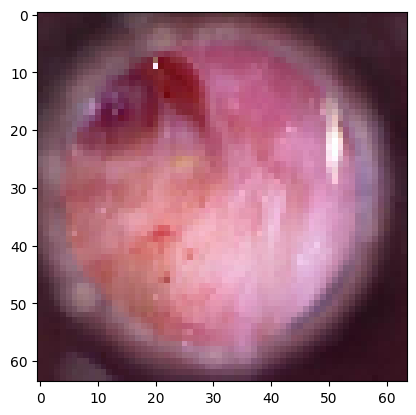

1/1 [==============================] - 0s 334ms/step
o36.jpg
normal


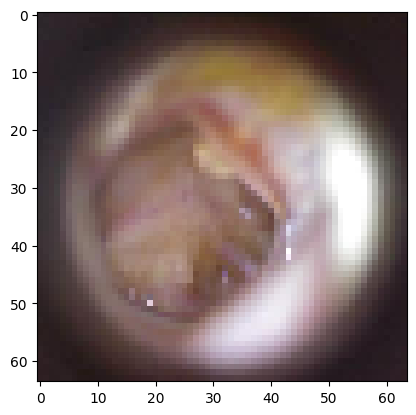

1/1 [==============================] - 0s 369ms/step
o37.jpg
normal


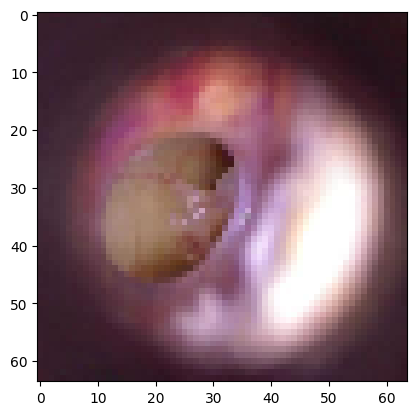

1/1 [==============================] - 0s 236ms/step
o38.jpg
normal


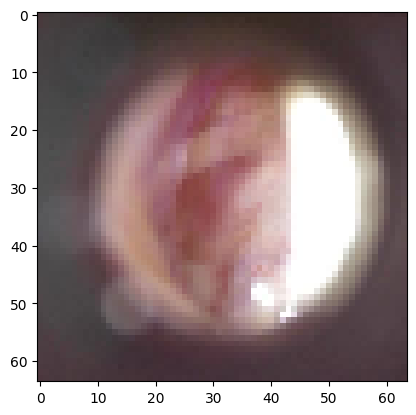

1/1 [==============================] - 0s 163ms/step
o39.jpg
normal


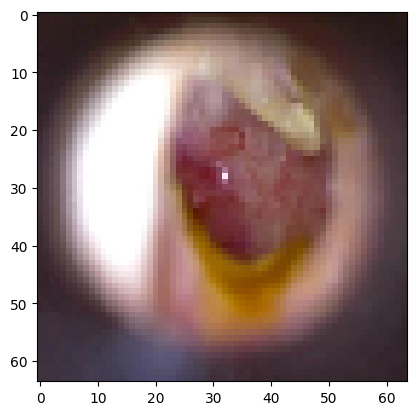

1/1 [==============================] - 0s 350ms/step
o4.jpg
normal


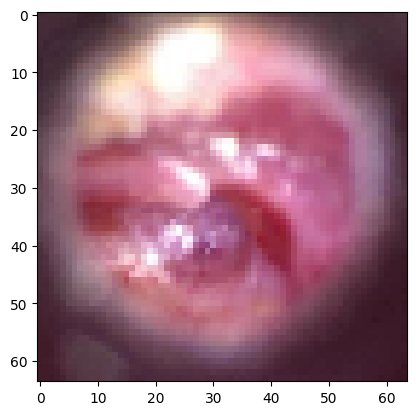

1/1 [==============================] - 0s 279ms/step
o40.jpg
normal


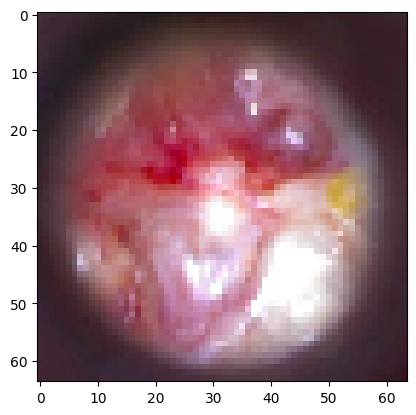

1/1 [==============================] - 0s 266ms/step
o5.jpg
normal


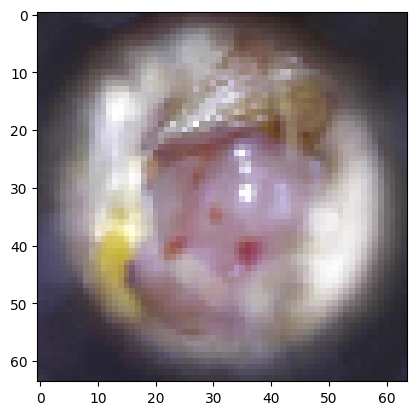

1/1 [==============================] - 0s 297ms/step
o6.jpg
normal


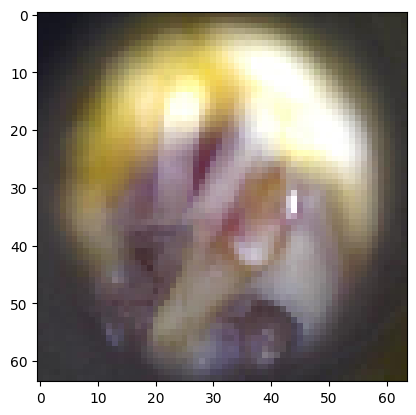

1/1 [==============================] - 0s 263ms/step
o7.jpg
normal


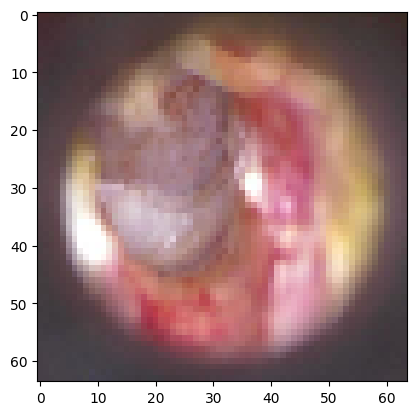

1/1 [==============================] - 0s 428ms/step
o8.jpg
normal


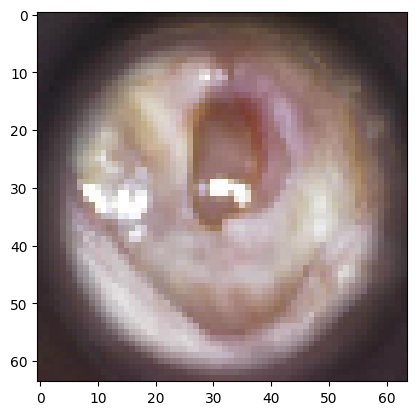

1/1 [==============================] - 0s 246ms/step
o9.jpg
normal


In [30]:
dir_path = 'C:/Users/Dell/Desktop/finalyrproject/Dataset otitis media/Testing/Chronic otitis media'

# {'earVentilationTube': 0,
#  'earwax': 1,
#  'normal': 2,
#  'otitisexterna': 3,
#  'pseudoMembranes': 4,
#  'tympanoskleros': 5}
{'Earwaxplug': 0, 'normal': 1, 'Chronic Otitis Media': 2, 'Myringosclerosis': 3}

for i in os.listdir(dir_path):
  img = image.load_img(dir_path+'//'+i, target_size=(64,64))
  plt.imshow(img)
  plt.show()

  X = image.img_to_array(img)
  X = np.expand_dims(X , axis = 0)
  images = np.vstack([X])
  val = model.predict(images)
  print(i)

  if val.any()==0:
    print("Earwaxplug")
  elif val.any()==1:
    print("normal")
  elif val.any()==2:
    print("Chronic Otitis Media")
  elif val.any()==3:
    print("Myringosclerosis")
  # elif val.any()==4:
  #   print("pseudomembranes")
  # elif val.any()==5:
  #   print("tymponoskleros")







#   from sklearn.metrics import roc_curve, auc
# from sklearn.preprocessing import label_binarize
# from sklearn.multiclass import OneVsRestClassifier
# import numpy as np
# import matplotlib.pyplot as plt

# # Assuming you have the true class labels and predicted probabilities
# # true_classes: Ground truth class labels (e.g., one-hot encoded)
# # predicted_probabilities: Predicted probabilities for each class

# # Binarize the true class labels
# true_classes_binarized = label_binarize(true_classes, classes=np.arange(num_classes))

# # Initialize the OneVsRestClassifier
# classifier = OneVsRestClassifier(model)

# # Compute ROC curve and ROC area for each class
# fpr = dict()
# tpr = dict()
# roc_auc = dict()

# for i in range(num_classes):
#     fpr[i], tpr[i], _ = roc_curve(true_classes_binarized[:, i], predicted_probabilities[:, i])
#     roc_auc[i] = auc(fpr[i], tpr[i])

# # Plot ROC curves for each class
# plt.figure()
# colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']  # You can add more colors if needed

# for i, color in zip(range(num_classes), colors):
#     plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve (area = %0.2f)' % roc_auc[i])

# plt.plot([0, 1], [0, 1], 'k--', lw=2)
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic')
# plt.legend(loc="lower right")
# plt.show()



